In [ ]:
# from google.colab import files

# upload = files.upload()


# Importing Data


In [ ]:
!pip install numpy==1.23.5 gensim==4.3.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 112.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 79.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
bigframes 2.1.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.6 requires numpy>=1.24.4, but you have numpy 1.23.5 whic

In [ ]:
!pip uninstall -y scipy
!pip install scipy==1.10.1

Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Successfully uninstalled scipy-1.10.1
  Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
albumentations 2.0.6 requires numpy>=1.24.4, but you have numpy 1.23.5 which is inc

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.tr.300.vec.gz


--2025-05-12 12:10:45--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.tr.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.154.144.13, 18.154.144.74, 18.154.144.87, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.154.144.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1261500728 (1.2G) [binary/octet-stream]
Saving to: ‘cc.tr.300.vec.gz’

cc.tr.300.vec.gz    100%[===================>]   1.17G  35.3MB/s    in 32s     

2025-05-12 12:11:18 (37.4 MB/s) - ‘cc.tr.300.vec.gz’ saved [1261500728/1261500728]



In [ ]:
import pandas as pd

# Kullandığımız veri setindeki satırları "|" ayıracı ile ayırıyoruz.
df = pd.read_csv('/content/preprocessed_train_40k.csv')
df = df[["text", "label"]]
df.head()

,text,label
0,gercekten sizin hikayelerinizi izleyerek mi ye...,0
1,coook cok bi baklava bi sen zaten,0
2,sn dukel ataturkun karma ile baslattigi siyasi...,0
3,konfederasyonumuzun aile ve sosyal politikalar...,0
4,hakemler tarih yaziyorlar kisiye karsi 32 onde...,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Veri seti hakkında bilgileri yazdırdık.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42398 entries, 0 to 42397
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    42396 non-null  object
 1   label   42398 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 662.6+ KB


([<matplotlib.patches.Wedge at 0x7ae4857b3e10>,
 [Text(-1.0941706636813076, -0.11309535242089684, 'Zararsiz'),
  Text(1.0941707077221812, 0.11309492633509963, 'Zararli')],
 [Text(-0.5968203620079859, -0.06168837404776191, '53.3%'),
  Text(0.5968203860302805, 0.06168814163732706, '46.7%')])

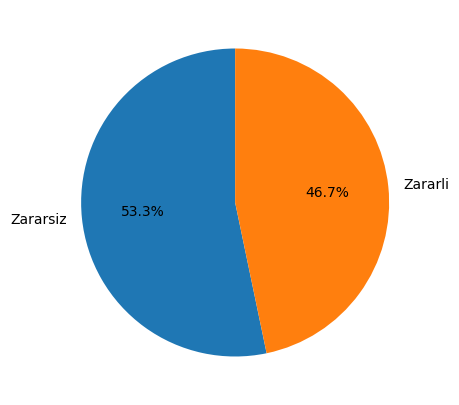

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5)

# OTHER kategorisindeki veri adetini hesapladik.
positive = len(df[df['label'] == 0])
# (RACIST+INSULT+PROFANITY+SEXIST) kategorisindeki veri adetini hesapladik.
negative = len(df[df['label'] == 1])
# Dairesel grafikteki verilerimizi ayarladık.
pie_y = [positive, negative]
# Dairesel grafikteki verilerimizin adını ayarladık.
pie_labels = ["Zararsiz", "Zararli"]

# Dairesel grafiğimizi oluşturduk.
plt.pie(pie_y, labels=pie_labels, startangle=90, autopct='%1.1f%%')

# Her bir kategorideki veri adeti

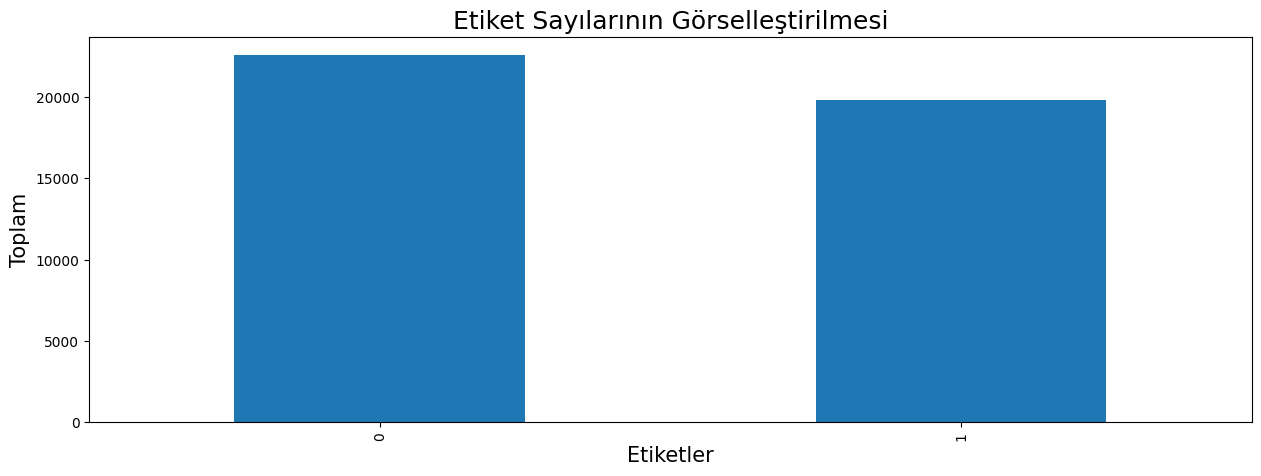

In [ ]:
from collections import Counter
# TARGET sütunundaki kategorileri bulduk.
tags = Counter(df["label"]).keys()
# TARGET sütunundaki kategorilerin adetini bulduk.
tags_len = Counter(df["label"]).values()

# Kategori ismi ve adet sayısını veri seti haline getirdik.
tag_df = pd.DataFrame(zip(tags, tags_len), columns=["Sinif", "Toplam"])
# Plot grafiğimizi oluşturduk.
tag_df.plot(x="Sinif", y="Toplam", kind="bar", legend=False, grid=False, figsize=(15,5))
# Plot grafiğimizin başlığını ayarladık.
plt.title("Etiket Sayılarının Görselleştirilmesi", fontsize=18)
# Plot grafiğimizin x ekseni başlığını ayarladık.
plt.xlabel("Etiketler", fontsize=15)
# Plot grafiğimizin y ekseni başlığını ayarladık.
plt.ylabel("Toplam", fontsize=15)
# Plot grafiğimizi ekrana yazdırdık.
plt.show()

# Temizlemeden önceki en sık kullanılan kelimeler

In [ ]:
import nltk
import string
# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

# Bir kategorideki en sık geçen kelimeleri bulmaya yarayan fonksiyonumuzu tanımladık.
def word_freq(CATEGORY):
  # Parametre olarak verilen kategoriyi kullanarak veri setimizi oluşturduk.
  freq_df = df[df['label'] == CATEGORY]
  # Kategorimizin text sınıfındaki satırlardaki kelimeleri bir değişkene aktardık.
  freq_words = freq_df["text"].tolist()
  # The error is likely due to some values in the "text" column being floats or NaNs.
  # This line converts all elements of freq_words to strings before applying lower(),
  # preventing the AttributeError.
  freq_words = [str(i).lower() for i in freq_words]
  freq_punc = []
  # Dizimizdeki kelimelerin sıklığındaki noktalama işaretlerini saydık.
  for o in freq_words:
    freq_punc += nltk.word_tokenize(o)
  freq_punc = [o for o in freq_punc if o not in string.punctuation]
  freq_freq = Counter(freq_punc)
  # En sık geçen 15 kelimeyi bir değişkene atadık.
  freq_top = freq_freq.most_common(15)


  words = [word for word, _ in freq_top]

  counts = [counts for _, counts in freq_top]

  # Sütun grafiğimizi oluşturduk.
  plt.bar(words, counts)
  # Sütun grafiğimizin başlığını ayarladık.
  plt.title(f"{CATEGORY} SINIFINDAKI EN SIK GECEN 15 KELIME")
  # Sütun grafiğimizin y ekseni başlığını ayarladık.
  plt.ylabel("Frekans")
  # Sütun grafiğimizin x ekseni başlığını ayarladık.
  plt.xlabel("Kelimeler")
  # Sütün grafiğimizi ekrana bastırdık.
  plt.show()

  # WordCloud'da kullanmak için en sık geçen kelimeleri döndürdük.
  return freq_top

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


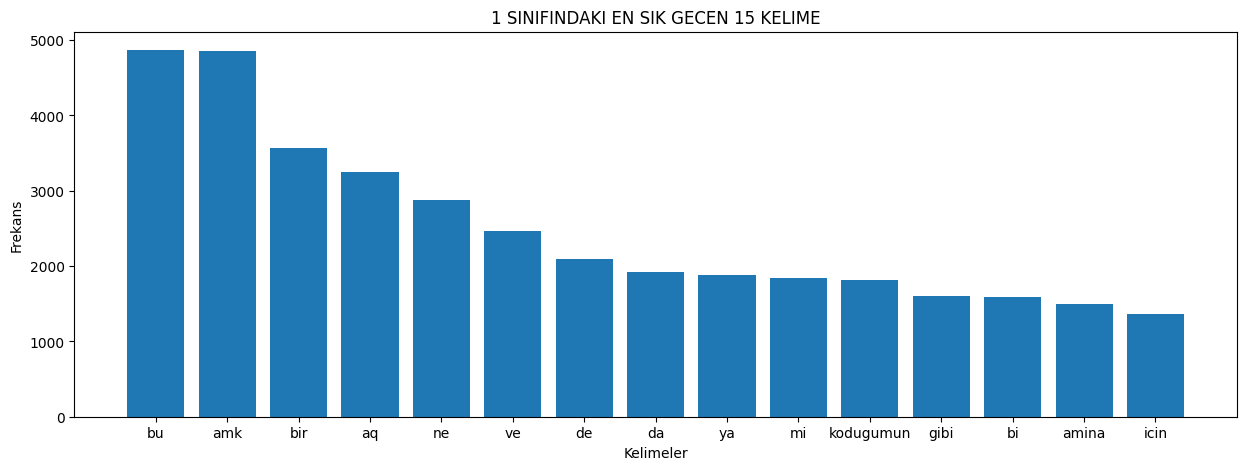

In [ ]:
# 1 kategorisindeki en sık geçen 15 kelimeyi gösteren grafiği ekrana yazdırdık.
negative_top = word_freq(1)

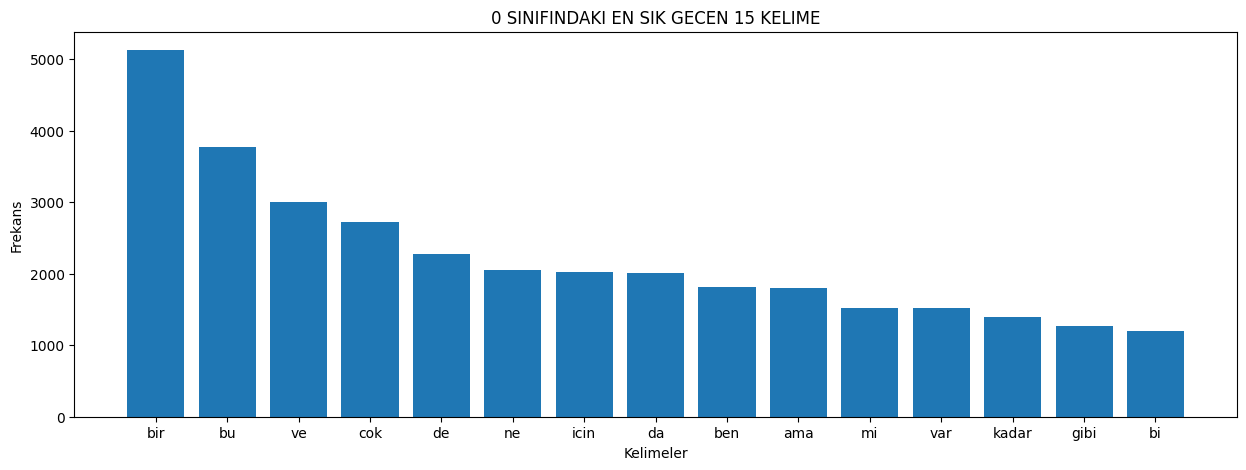

In [ ]:
# 0 kategorisindeki en sık geçen 15 kelimeyi gösteren grafiği ekrana yazdırdık.
positive_top = word_freq(0)

In [ ]:
from gensim.models import KeyedVectors
from torch.utils.data import Dataset
import torch
import numpy as np
from gensim.models import KeyedVectors

In [ ]:
fasttext_model = KeyedVectors.load_word2vec_format('/content/cc.tr.300.vec.gz', binary=False)


In [ ]:
fasttext_model.save('cc.tr.300.kv')

In [ ]:
def sentence_to_vec(sentence, model, dim=300, max_len=20):
    sentence = str(sentence)
    words = sentence.lower().split()
    vecs = []
    for word in words:
        if word in model:
            vecs.append(model[word])
    # Şimdi padding yapacağız
    if len(vecs) < max_len:
        # Eksik kelime kadar sıfır vektör ekle
        vecs.extend([np.zeros(dim)] * (max_len - len(vecs)))
    else:
        # Fazlaysa kırp
        vecs = vecs[:max_len]
    return np.array(vecs)




class FastTextDataset(Dataset):
    def __init__(self, dataframe, model, max_len=20):
        self.labels = dataframe["label"].values
        self.texts = [sentence_to_vec(text, model, max_len=max_len) for text in dataframe["text"]]

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        text_vec = torch.tensor(self.texts[idx], dtype=torch.float32)  # (max_len, 300)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return text_vec, label





# Dataset oluştur
dataset = FastTextDataset(df, fasttext_model)

# Örnek: İlk örneği kontrol edelim
sample_x, sample_y = dataset[0]
print("Örnek vektör şekli:", sample_x.shape)
print("Etiketi:", sample_y)

Örnek vektör şekli: torch.Size([20, 300])
Etiketi: tensor(0)


In [ ]:
# Örnek bir cümle seçelim
example_sentence = "bu ürün çok kötü"

# Cümleyi vektörleştirelim
vector = sentence_to_vec(example_sentence, fasttext_model)

# Vektörü yazdıralım
print(vector)
print(f"Vektör boyutu: {vector.shape}")


[[ 0.17039999  0.0893     -0.19750001 ...  0.1169     -0.004
  -0.0674    ]
 [ 0.1079      0.0117      0.1242     ... -0.0176     -0.078
   0.0753    ]
 [ 0.0222     -0.0735     -0.0031     ... -0.0133     -0.0151
   0.0036    ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
Vektör boyutu: (20, 300)


In [ ]:
def train_validate_test_split(df):
    # Rastgelelik durumu.
    np.random.seed(4242)
    # Diziyi rastgele permute eder.
    perm = np.random.permutation(df.index)
    # Veri setinin %60'ının sayısal değeri hesaplandı.
    train_end = int(.6 * len(df.index))
    # Veri setinin %20'sinin sayısal değeri hesaplandı.
    validate_end = int(.2 * len(df.index)) + train_end
    # Veri setinin %60'ını train etmek için ayırdık.
    train = df.iloc[perm[:train_end]]
    # Veri setinin %20'sini validation etmek için ayırdık.
    validate = df.iloc[perm[train_end:validate_end]]
    # Veri setinin %20'sini test etmek için ayırdık.
    test = df.iloc[perm[validate_end:]]
    # train, validation, test veri setlerini döndür.
    return train, validate, test

# Train, Validation ve Test için veri setlerimiz oluşturduk.
df_train, df_validation, df_test = train_validate_test_split(df)
# Train, Validation ve Test için oluşturduğumuz veri setlerinin uzunluğunu ekrana yazdırdık. (%60 - %20 - %20)
print(len(df_train), len(df_validation), len(df_test))

25438 8479 8481


In [ ]:
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim

class FastTextLSTMClassifier(nn.Module):
    def __init__(self, embedding_dim=300, hidden_dim=128, output_dim=2, num_layers=1):
        super(FastTextLSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_dim,
                            num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        lstm_out, (h_n, c_n) = self.lstm(x)
        # h_n[-1] son katmandaki gizli durum
        out = self.fc(h_n[-1])
        return out



In [ ]:
# Eğitim tur sayısı
EPOCHS = 10
# FastText model tanımlaması
model = FastTextLSTMClassifier()
# Öğrenme oranı
LR = 1e-3

# FastText Dataset
train = FastTextDataset(df_train, fasttext_model)
validation = FastTextDataset(df_validation, fasttext_model)

# DataLoader
tdl = torch.utils.data.DataLoader(train, batch_size=32, shuffle=True)
vdl = torch.utils.data.DataLoader(validation, batch_size=32)

# Cihaz seçimi
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Loss ve optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# Modeli cihaza taşı
model = model.to(device)

# Eğitim döngüsü
for EPOCH in range(EPOCHS):
    total_train_accuracy = 0
    total_train_loss = 0
    total_validation_accuracy = 0
    total_validation_loss = 0

    model.train()
    for texts, labels in tdl:
        texts, labels = texts.to(device), labels.to(device)

        outputs = model(texts)

        batch_loss = criterion(outputs, labels)
        total_train_loss += batch_loss.item()

        train_accuracy = (outputs.argmax(dim=1) == labels).sum().item()
        total_train_accuracy += train_accuracy

        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        for texts, labels in vdl:
            texts, labels = texts.to(device), labels.to(device)

            outputs = model(texts)

            batch_loss = criterion(outputs, labels)
            total_validation_loss += batch_loss.item()

            validation_accuracy = (outputs.argmax(dim=1) == labels).sum().item()
            total_validation_accuracy += validation_accuracy

    print(f'Epochs: {EPOCH + 1}')
    print(f'Train Loss: {total_train_loss / len(df_train): .4f}')
    print(f'Train Accuracy: {total_train_accuracy / len(df_train): .4f}')
    print(f'Validation Loss: {total_validation_loss / len(df_validation): .4f}')
    print(f'Validation Accuracy: {total_validation_accuracy / len(df_validation): .4f}')


Epochs: 1
Train Loss:  0.0116
Train Accuracy:  0.8308
Validation Loss:  0.0096
Validation Accuracy:  0.8712
Epochs: 2
Train Loss:  0.0096
Train Accuracy:  0.8708
Validation Loss:  0.0095
Validation Accuracy:  0.8766
Epochs: 3
Train Loss:  0.0091
Train Accuracy:  0.8784
Validation Loss:  0.0092
Validation Accuracy:  0.8821
Epochs: 4
Train Loss:  0.0087
Train Accuracy:  0.8837
Validation Loss:  0.0088
Validation Accuracy:  0.8822
Epochs: 5
Train Loss:  0.0085
Train Accuracy:  0.8867
Validation Loss:  0.0089
Validation Accuracy:  0.8825
Epochs: 6
Train Loss:  0.0082
Train Accuracy:  0.8896
Validation Loss:  0.0088
Validation Accuracy:  0.8810
Epochs: 7
Train Loss:  0.0080
Train Accuracy:  0.8950
Validation Loss:  0.0088
Validation Accuracy:  0.8857
Epochs: 8
Train Loss:  0.0077
Train Accuracy:  0.8971
Validation Loss:  0.0090
Validation Accuracy:  0.8821
Epochs: 9
Train Loss:  0.0074
Train Accuracy:  0.9021
Validation Loss:  0.0089
Validation Accuracy:  0.8819
Epochs: 10
Train Loss:  0.00

In [ ]:
# Eğitimi tamamladıktan sonra modeli kaydet
torch.save(model, 'fasttext_lstm_model.pt')


In [ ]:
# Test için ayırdığımız veri setlerini
test = FastTextDataset(df_test, fasttext_model)

# DataLoader ile batch'liyoruz
tdl = torch.utils.data.DataLoader(test, batch_size=2)

device = torch.device("cuda")
model = model.cuda()

# Toplam test doğruluğu
total_test_accuracy = 0

# Test işlemi sırasında model ağırlıklarını değiştirmeyeceğimiz modelin gradyanlara ihtiyacı yoktur
# "no_grad" fonksiyonu ile gradyan hesaplarını devre dışı bırakıyoruz.
with torch.no_grad():
    for test_input, test_label in tdl:
        # Verileri cihazımıza (GPU/CPU) gönderiyoruz
        test_label = test_label.to(device)

        # Input verisini ve maskeyi modele uygun hale getiriyoruz
        input_id = test_input.to(device)

        # Modelin tahminlerini alıyoruz
        output = model(input_id)

        # Doğruluğu hesaplıyoruz
        test_accuracy = (output.argmax(dim=1) == test_label).sum().item()
        total_test_accuracy += test_accuracy

# Test doğruluğunu normalize ediyoruz
test_accuracy = total_test_accuracy / len(tdl.dataset)
print(f'Test Accuracy: {test_accuracy:.3f}')


Test Accuracy: 0.883


In [ ]:
def predict_sentence(model, sentence, fasttext_model, device='cuda'):
    model.eval()  # Modeli eval moduna alıyoruz (dropout vs kapansın diye)

    # Cümleyi vektöre çevir
    vec = sentence_to_vec(sentence, fasttext_model)  # Bu eskisi gibi ortalama vektör döndürüyor
    vec = torch.tensor(vec, dtype=torch.float32).to(device)  # Tensora çevir
    vec = vec.unsqueeze(0)  # (1, 300) -> batch dimension

    with torch.no_grad():
        output = model(vec)  # Modelden çıktı al
        prediction = output.argmax(dim=1).item()  # En yüksek skorlu sınıfı seç

    return prediction  # 0 veya 1 döner

sentence = "test cümlesi"
result = predict_sentence(model, sentence, fasttext_model)

print("Tahmin:", result)  # 0 veya 1 döner


Tahmin: 0


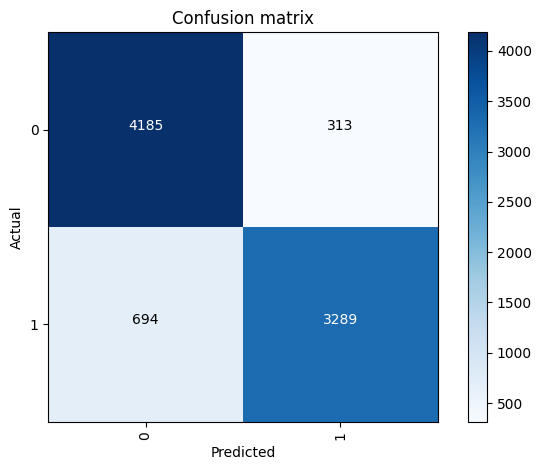

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(predicted, actuals, sub_classes, title='Confusion matrix', cmap=plt.cm.Blues):
    # Confusion Matrix oluştur
    confusion = confusion_matrix(actuals, predicted)  # DİKKAT: actuals, predicted sırası değişti!

    plt.imshow(confusion, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(sub_classes))
    plt.xticks(tick_marks, sub_classes, rotation=90)
    plt.yticks(tick_marks, sub_classes)

    # Confusion matrix içindeki sayıları yaz
    for i, j in itertools.product(range(confusion.shape[0]), range(confusion.shape[1])):
        plt.text(j, i, format(confusion[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion[i, j] > confusion.max() / 2. else "black")

    plt.rcParams["figure.figsize"] = (10, 8)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

# Burada sub_classes listesini oluşturuyoruz
sub_classes = sorted(df_test['label'].unique())  # Etiketleri sırala

# Ve fonksiyonu çağırıyoruz
plot_confusion_matrix(predicted, actuals, sub_classes=sub_classes)
